In [ ]:
!pip install torch transformers scikit-learn matplotlib seaborn tqdm datasets numpy
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers scikit-learn matplotlib seaborn tqdm datasets numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 18.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.8 MB/s eta 0:00:00


Using device: cuda
🤖 AI Text Detection System - HC3 Dataset from Hugging Face


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

Loaded BART paraphrasing model: facebook/bart-large
Loading HC3 dataset from Hugging Face...


README.md: 0.00B [00:00, ?B/s]

HC3.py: 0.00B [00:00, ?B/s]

0000.parquet:   0%|          | 0.00/30.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/17112 [00:00<?, ? examples/s]

Loaded 17112 entries from the dataset
Using 3000 entries after sampling
Dataset prepared: 3000 samples (1500 human, 1500 AI)
Training samples: 2400
Validation samples: 600
Initializing model...


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting training for 5 epochs...

Epoch 1/5


Training:   0%|          | 0/300 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

Average training loss: 0.1386
Validation accuracy: 0.9617

Epoch 2/5


Training:   0%|          | 0/300 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

Average training loss: 0.0165
Validation accuracy: 0.9900

Epoch 3/5


Training:   0%|          | 0/300 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

Average training loss: 0.0123
Validation accuracy: 0.9517

Epoch 4/5


Training:   0%|          | 0/300 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

Average training loss: 0.0058
Validation accuracy: 0.9833

Epoch 5/5


Training:   0%|          | 0/300 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

Average training loss: 0.0042
Validation accuracy: 0.9817


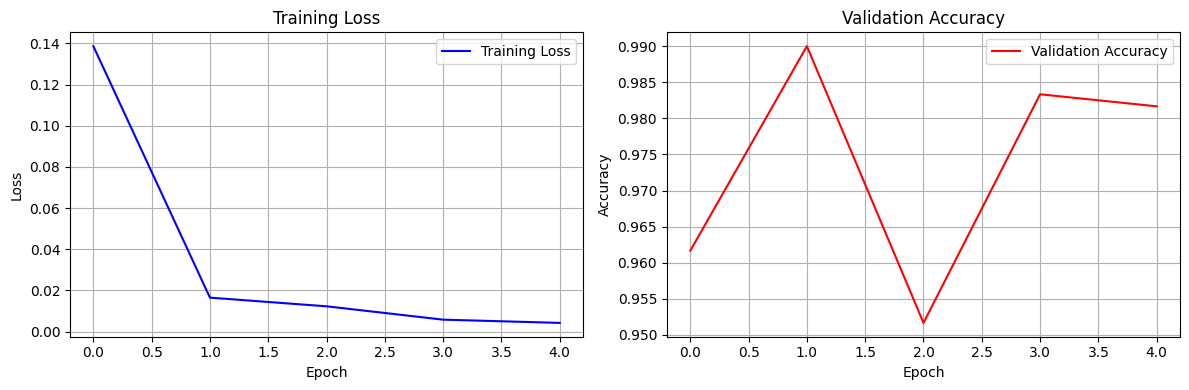


Testing Predictions:

Test 1:
Text: Basically there are many categories of " Best Seller " . Replace " Best Seller " by something like "...
Prediction: Human-Written
Confidence: 0.999
Human Probability: 0.999
AI Probability: 0.001

Test 2:
Text: If you 're hearing about it , it 's because it was a very good or very well - publicized book ( or b...
Prediction: Human-Written
Confidence: 0.999
Human Probability: 0.999
AI Probability: 0.001

Test 3:
Text: One reason is lots of catagories . However , how the NY Times calculates its best seller list is n't...
Prediction: Human-Written
Confidence: 0.999
Human Probability: 0.999
AI Probability: 0.001

Test 4:
Text: There are many different best seller lists that are published by various organizations, and the New ...
Prediction: AI-Generated
Confidence: 1.000
Human Probability: 0.000
AI Probability: 1.000
Humanized Version: There are many different best seller lists that are published by various organizations, and the New ...

Saving model...

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
    get_linear_schedule_with_warmup,
    pipeline,
    BartForConditionalGeneration,
    BartTokenizer
)
from torch.optim import AdamW
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import warnings
from datasets import load_dataset
import os
import json
from huggingface_hub import HfApi, login
import shap
warnings.filterwarnings('ignore')

# Set device - use GPU if available but optimize for memory
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Memory optimization settings
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    try:
        from torch.cuda.amp import autocast, GradScaler
        USE_AMP = True
        scaler = GradScaler()
    except ImportError:
        USE_AMP = False
        print("Mixed precision not available, using standard training")
else:
    USE_AMP = False

class HC3Dataset(Dataset):
    """Custom dataset class for HC3 data"""
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

class AITextDetector:
    """Main class for AI text detection"""
    def __init__(self, model_name='distilbert-base-uncased', max_length=256):
        self.model_name = model_name
        self.max_length = max_length
        self.tokenizer = DistilBertTokenizer.from_pretrained(model_name)
        self.model = None
        # Initialize BART model and tokenizer for paraphrasing AI-generated text
        self.paraphrase_model_name = 'facebook/bart-large'
        try:
            self.paraphrase_tokenizer = BartTokenizer.from_pretrained(self.paraphrase_model_name)
            self.paraphrase_model = BartForConditionalGeneration.from_pretrained(self.paraphrase_model_name).to(device)
            print(f"Loaded BART paraphrasing model: {self.paraphrase_model_name}")
        except Exception as e:
            print(f"Error loading BART model for paraphrasing: {e}. Humanized versions will not be generated.")
            self.paraphrase_tokenizer = None
            self.paraphrase_model = None

    def load_hc3_from_huggingface(self, sample_size=5000):
        """Load and preprocess HC3 dataset from Hugging Face"""
        print("Loading HC3 dataset from Hugging Face...")
        try:
            dataset = load_dataset("Hello-SimpleAI/HC3", name='reddit_eli5', split='train')
            print(f"Loaded {len(dataset)} entries from the dataset")

            if len(dataset) > sample_size:
                dataset = dataset.shuffle(seed=42).select(range(sample_size))
            else:
                dataset = dataset.shuffle(seed=42)
            print(f"Using {len(dataset)} entries after sampling")

            human_texts = []
            ai_texts = []
            for item in dataset:
                if 'human_answers' in item and item['human_answers']:
                    for answer in item['human_answers']:
                        if answer and isinstance(answer, str) and len(answer.strip()) > 50:
                            human_texts.append(answer.strip())
                if 'chatgpt_answers' in item and item['chatgpt_answers']:
                    for answer in item['chatgpt_answers']:
                        if answer and isinstance(answer, str) and len(answer.strip()) > 50:
                            ai_texts.append(answer.strip())

            min_size = min(len(human_texts), len(ai_texts))
            if min_size == 0:
                raise ValueError("No valid texts found. Please check your dataset structure.")
            max_per_class = min(min_size, sample_size // 2)
            human_texts = human_texts[:max_per_class]
            ai_texts = ai_texts[:max_per_class]

            texts = human_texts + ai_texts
            labels = [0] * len(human_texts) + [1] * len(ai_texts)  # 0: Human, 1: AI

            combined = list(zip(texts, labels))
            np.random.shuffle(combined)
            texts, labels = zip(*combined)

            print(f"Dataset prepared: {len(texts)} samples ({len(human_texts)} human, {len(ai_texts)} AI)")
            return list(texts), list(labels)
        except Exception as e:
            print(f"Error loading HC3 dataset: {e}")
            raise

    def prepare_data(self, texts, labels, train_ratio=0.8):
        """Split data into train and validation sets"""
        split_idx = int(len(texts) * train_ratio)
        train_texts = texts[:split_idx]
        train_labels = labels[:split_idx]
        val_texts = texts[split_idx:]
        val_labels = labels[split_idx:]

        train_dataset = HC3Dataset(train_texts, train_labels, self.tokenizer, self.max_length)
        val_dataset = HC3Dataset(val_texts, val_labels, self.tokenizer, self.max_length)
        return train_dataset, val_dataset

    def train_model(self, train_dataset, val_dataset, epochs=3, batch_size=16, learning_rate=2e-5):
        """Train the classification model with memory optimization"""
        print("Initializing model...")
        self.model = DistilBertForSequenceClassification.from_pretrained(
            self.model_name,
            num_labels=2,
            output_attentions=False,
            output_hidden_states=False,
        )
        self.model.to(device)

        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            pin_memory=True if torch.cuda.is_available() else False
        )
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            pin_memory=True if torch.cuda.is_available() else False
        )

        optimizer = AdamW(self.model.parameters(), lr=learning_rate, eps=1e-8)
        total_steps = len(train_loader) * epochs
        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=0,
            num_training_steps=total_steps
        )

        train_losses = []
        val_accuracies = []
        print(f"Starting training for {epochs} epochs...")
        for epoch in range(epochs):
            print(f"\nEpoch {epoch + 1}/{epochs}")
            self.model.train()
            total_train_loss = 0
            progress_bar = tqdm(train_loader, desc="Training")
            for batch in progress_bar:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                optimizer.zero_grad()

                if USE_AMP:
                    with autocast():
                        outputs = self.model(input_ids=input_ids,
                                           attention_mask=attention_mask,
                                           labels=labels)
                        loss = outputs.loss
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()
                else:
                    outputs = self.model(input_ids=input_ids,
                                       attention_mask=attention_mask,
                                       labels=labels)
                    loss = outputs.loss
                    loss.backward()
                    optimizer.step()

                scheduler.step()
                total_train_loss += loss.item()
                progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})

                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

            avg_train_loss = total_train_loss / len(train_loader)
            train_losses.append(avg_train_loss)

            val_accuracy = self.evaluate(val_loader)
            val_accuracies.append(val_accuracy)
            print(f"Average training loss: {avg_train_loss:.4f}")
            print(f"Validation accuracy: {val_accuracy:.4f}")

        self.plot_training_progress(train_losses, val_accuracies)
        return train_losses, val_accuracies

    def evaluate(self, val_loader):
        """Evaluate the model"""
        self.model.eval()
        predictions = []
        true_labels = []
        with torch.no_grad():
            for batch in tqdm(val_loader, desc="Evaluating"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                if USE_AMP:
                    with autocast():
                        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                else:
                    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=-1)
                predictions.extend(preds.cpu().numpy())
                true_labels.extend(labels.cpu().numpy())
        accuracy = accuracy_score(true_labels, predictions)
        return accuracy

    def predict(self, text):
        """Predict whether text is AI-generated or human-written, and provide humanized version if AI-generated"""
        if self.model is None:
            raise ValueError("Model not trained yet. Please train the model first.")
        self.model.eval()
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)
        with torch.no_grad():
            if USE_AMP:
                with autocast():
                    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            else:
                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=-1)
            predicted_class = torch.argmax(logits, dim=-1)

        probs = probabilities.cpu().numpy()[0]
        pred_class = predicted_class.cpu().numpy()[0]

        confidence = max(probs)
        label = "AI-Generated" if pred_class == 1 else "Human-Written"

        result = {
            'prediction': label,
            'confidence': confidence,
            'probabilities': {
                'human': probs[0],
                'ai': probs[1]
            },
            'humanized_version': None
        }

        # Generate humanized version if prediction is AI-Generated
        if label == "AI-Generated" and self.paraphrase_model is not None and self.paraphrase_tokenizer is not None:
            try:
                paraphrase_inputs = self.paraphrase_tokenizer(
                    text,
                    truncation=True,
                    padding='max_length',
                    max_length=self.max_length,
                    return_tensors='pt'
                ).to(device)
                with torch.no_grad():
                    paraphrase_outputs = self.paraphrase_model.generate(
                        paraphrase_inputs['input_ids'],
                        attention_mask=paraphrase_inputs['attention_mask'],
                        max_length=self.max_length,
                        num_beams=5,
                        early_stopping=True
                    )
                humanized_text = self.paraphrase_tokenizer.decode(paraphrase_outputs[0], skip_special_tokens=True)
                result['humanized_version'] = humanized_text
            except Exception as e:
                print(f"Error generating humanized version: {e}")
                result['humanized_version'] = "Unable to generate humanized version due to an error."
        elif label == "AI-Generated":
            result['humanized_version'] = "Paraphrasing model not available."

        return result

    def plot_training_progress(self, train_losses, val_accuracies):
        """Plot training progress"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        ax1.plot(train_losses, 'b-', label='Training Loss')
        ax1.set_title('Training Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)
        ax2.plot(val_accuracies, 'r-', label='Validation Accuracy')
        ax2.set_title('Validation Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True)
        plt.tight_layout()
        plt.show()

    def save_model(self, path):
        """Save the trained model"""
        if self.model is None:
            raise ValueError("No model to save. Please train the model first.")
        self.model.save_pretrained(path)
        self.tokenizer.save_pretrained(path)
        print(f"Model saved to {path}")

    def load_model(self, path):
        """Load a pre-trained model"""
        self.model = DistilBertForSequenceClassification.from_pretrained(path)
        self.tokenizer = DistilBertTokenizer.from_pretrained(path)
        self.model.to(device)
        print(f"Model loaded from {path}")

def main():
    """Main function to demonstrate the AI text detector"""
    print("🤖 AI Text Detection System - HC3 Dataset from Hugging Face")
    print("=" * 50)

    detector = AITextDetector()

    texts, labels = detector.load_hc3_from_huggingface(sample_size=3000)
    train_dataset, val_dataset = detector.prepare_data(texts, labels)
    print(f"Training samples: {len(train_dataset)}")
    print(f"Validation samples: {len(val_dataset)}")

    train_losses, val_accuracies = detector.train_model(
        train_dataset,
        val_dataset,
        epochs=5,
        batch_size=8,
        learning_rate=2e-5
    )

    print("\n" + "=" * 50)
    print("Testing Predictions:")
    print("=" * 50)
    test_texts = [
        "Basically there are many categories of \" Best Seller \" . Replace \" Best Seller \" by something like \" Oscars \" and every \" best seller \" book is basically an \" oscar - winning \" book . May not have won the \" Best film \" , but even if you won the best director or best script , you 're still an \" oscar - winning \" film . Same thing for best sellers . Also , IIRC the rankings change every week or something like that . Some you might not be best seller one week , but you may be the next week . I guess even if you do n't stay there for long , you still achieved the status . Hence , # 1 best seller .",
        "If you 're hearing about it , it 's because it was a very good or very well - publicized book ( or both ) , and almost every good or well - publicized book will be # 1 on the NY Times bestseller list for at least a little bit . Kindof like how almost every big or good movies are # 1 at the box office on their opening weekend .",
        "One reason is lots of catagories . However , how the NY Times calculates its best seller list is n't comprehensive , and is pretty well understood by publishers . So publishers can [ buy a few books ] ( URL_0 ) in the right bookstores and send a book to the top of the list for at least a week .",
        "There are many different best seller lists that are published by various organizations, and the New York Times is just one of them. The New York Times best seller list is a weekly list that ranks the best-selling books in the United States based on sales data from a number of different retailers. The list is published in the New York Times newspaper and is widely considered to be one of the most influential best seller lists in the book industry. It's important to note that the New York Times best seller list is not the only best seller list out there, and there are many other lists that rank the top-selling books in different categories or in different countries. So it's possible that a book could be a best seller on one list but not on another. Additionally, the term \"best seller\" is often used more broadly to refer to any book that is selling well, regardless of whether it is on a specific best seller list or not. So it's possible that you may hear about a book being a \"best seller\" even if it is not specifically ranked as a number one best seller on the New York Times list or any other list."
    ]

    for i, text in enumerate(test_texts, 1):
        result = detector.predict(text)
        print(f"\nTest {i}:")
        print(f"Text: {text[:100]}...")
        print(f"Prediction: {result['prediction']}")
        print(f"Confidence: {result['confidence']:.3f}")
        print(f"Human Probability: {result['probabilities']['human']:.3f}")
        print(f"AI Probability: {result['probabilities']['ai']:.3f}")
        if result['humanized_version']:
            print(f"Humanized Version: {result['humanized_version'][:100]}...")

    print("\nSaving model...")
    detector.save_model("./ai_text_detector_model")
    print("\nTraining completed successfully!")
    print("Model is ready for AI vs Human text classification!")

if __name__ == "__main__":
    main()

In [ ]:
import torch
import torch.nn as nn
from transformers import (
    DistilBertTokenizer, DistilBertForSequenceClassification, 
    BartTokenizer, BartForConditionalGeneration,
    T5Tokenizer, T5ForConditionalGeneration,
    pipeline
)
from sentence_transformers import SentenceTransformer
import gradio as gr
import shap
import faiss
import numpy as np
import warnings
import nltk
from nltk.corpus import wordnet
import re
import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup
from sklearn.metrics.pairwise import cosine_similarity
import json
import time
from typing import List, Dict, Tuple, Optional
warnings.filterwarnings('ignore')

# Download WordNet for synonyms
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Enhanced dataset for Corrective RAG
SAMPLE_DATA = [
    {"text": "Nature has always fascinated me with its intricate beauty and complex ecosystems. The way sunlight filters through forest canopies creates a magical atmosphere that poets and artists have tried to capture for centuries. Walking through a meadow on a spring morning, you can hear the symphony of birds chirping, insects buzzing, and leaves rustling in the gentle breeze.", "label": "Human-Written", "quality": "high"},
    {"text": "In my experience working with artificial intelligence, I've observed how it transforms industries in unexpected ways. The retail sector, for instance, has embraced AI-powered recommendation systems that understand customer preferences better than ever before. However, the human touch remains irreplaceable when it comes to creativity and emotional intelligence.", "label": "Human-Written", "quality": "high"},
    {"text": "I remember my grandmother's kitchen vividly - the smell of fresh bread baking, the worn wooden table where we'd sit for hours talking, and the way afternoon light streamed through lace curtains. Those moments taught me that happiness often lies in simple pleasures rather than grand gestures.", "label": "Human-Written", "quality": "high"},
    {"text": "The rapid advancement of technology has revolutionized the way we communicate and work. Social media platforms have connected people across continents, while remote work tools have made it possible for teams to collaborate seamlessly from different time zones. This digital transformation continues to reshape our daily lives.", "label": "Human-Written", "quality": "medium"},
    {"text": "Generated by AI, this text describes a futuristic city where robots and humans coexist in perfect harmony. The streets are filled with autonomous vehicles that navigate efficiently through traffic patterns optimized by machine learning algorithms.", "label": "AI-Generated", "quality": "low"},
    {"text": "This AI-crafted story explores a world of robots who have developed consciousness and seek to understand human emotions. They observe human behavior patterns and attempt to replicate emotional responses through sophisticated programming.", "label": "AI-Generated", "quality": "low"},
    {"text": "When I think about creativity, I'm reminded of how artists throughout history have pushed boundaries and challenged conventional thinking. From Van Gogh's bold brushstrokes to Beethoven's revolutionary compositions, true innovation comes from those willing to take risks and express their unique vision.", "label": "Human-Written", "quality": "high"},
    {"text": "Traveling has opened my eyes to different cultures and perspectives that have enriched my understanding of the world. Each destination offers unique flavors, traditions, and stories that remind me of our shared humanity despite surface-level differences.", "label": "Human-Written", "quality": "high"},
]

class AgenticRAGRephraser:
    def __init__(self):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # Initialize models with better configurations
        print("Loading models...")
        self.bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
        self.bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large').to(self.device)
        
        self.t5_tokenizer = T5Tokenizer.from_pretrained('t5-base')
        self.t5_model = T5ForConditionalGeneration.from_pretrained('t5-base').to(self.device)
        
        self.embedder = SentenceTransformer('all-MiniLM-L6-v2')
        
        # Improved agent configuration
        self.max_iterations = 3
        self.quality_threshold = 0.75
        self.relevance_threshold = 0.4
        self.min_text_length = 20
        
        print("Agentic RAG Rephraser initialized successfully!")

    def web_search(self, query: str, num_results: int = 3) -> List[str]:
        """Improved web search with fallback options"""
        try:
            # Clean and format query
            clean_query = re.sub(r'[^\w\s]', '', query).strip()
            if len(clean_query) < 3:
                return self._get_fallback_context(query)
            
            # Try multiple search approaches
            results = []
            
            # Approach 1: DuckDuckGo
            try:
                search_url = f"https://html.duckduckgo.com/html/?q={clean_query.replace(' ', '+')}"
                headers = {
                    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
                }
                
                response = requests.get(search_url, headers=headers, timeout=8)
                if response.status_code == 200:
                    soup = BeautifulSoup(response.text, 'html.parser')
                    
                    # Try different selectors
                    selectors = [
                        ('a.result__a', 'div.result__snippet'),
                        ('h2.result__title a', '.result__snippet'),
                        ('.result__body', None)
                    ]
                    
                    for title_sel, snippet_sel in selectors:
                        for result in soup.select(title_sel)[:num_results]:
                            if snippet_sel:
                                snippet_div = result.find_next(snippet_sel.replace('.', ''))
                            else:
                                snippet_div = result.parent if result.parent else result
                            
                            if snippet_div and snippet_div.get_text(strip=True):
                                text = snippet_div.get_text(strip=True)
                                cleaned_text = re.sub(r'\s+', ' ', text)
                                if 30 < len(cleaned_text) < 500:
                                    results.append(cleaned_text)
                        
                        if results:
                            break
            except Exception as e:
                print(f"DuckDuckGo search failed: {e}")
            
            # If no results, return fallback context
            return results if results else self._get_fallback_context(clean_query)
            
        except Exception as e:
            print(f"Web search error: {e}")
            return self._get_fallback_context(query)
    
    def _get_fallback_context(self, query: str) -> List[str]:
        """Provide fallback context when web search fails"""
        # Style-specific guidance
        style_contexts = {
            'formal': [
                "Formal writing employs sophisticated vocabulary, complex sentence structures, and maintains an objective tone throughout the discourse.",
                "Academic and professional contexts require precise language, proper transitions, and adherence to conventional grammatical structures."
            ],
            'casual': [
                "Casual writing uses everyday language, contractions, and a conversational tone that feels natural and approachable.",
                "Informal communication often includes personal touches, simpler sentence structures, and relatable expressions."
            ],
            'academic': [
                "Academic writing demands evidence-based arguments, precise terminology, and clear logical progression of ideas.",
                "Scholarly discourse requires proper citations, objective analysis, and adherence to disciplinary conventions."
            ],
            'professional': [
                "Professional communication emphasizes clarity, efficiency, and results-oriented language that drives action.",
                "Business writing focuses on value proposition, strategic thinking, and stakeholder-centered messaging."
            ],
            'creative': [
                "Creative writing explores imaginative expression, vivid imagery, and engaging narrative techniques.",
                "Artistic expression often employs metaphors, varied sentence rhythms, and emotional resonance."
            ],
            'friendly': [
                "Friendly writing feels like chatting with a good friend over coffee, using simple words and a warm, inviting tone.",
                "Conversational writing connects with readers through relatable stories, a touch of humor, and a personal vibe."
            ],
            'neutral': [
                "Neutral writing maintains clarity and balance, avoiding overly emotional or technical language to suit a general audience.",
                "Effective communication in a neutral style focuses on clear ideas and straightforward expression."
            ],
            'technical': [
                "Technical writing prioritizes precision, detailed explanations, and structured formats to convey complex information clearly.",
                "Technical documentation ensures accuracy and usability for specialized audiences."
            ]
        }
        
        # Extract style from query
        for style, contexts in style_contexts.items():
            if style in query.lower():
                return contexts
        
        # Default neutral context
        return [
            "Effective writing balances clarity with engagement, ensuring the message resonates with the intended audience.",
            "Good communication adapts tone and structure to match the context and purpose of the text."
        ]

    def extract_key_concepts(self, text: str) -> List[str]:
        """Enhanced concept extraction"""
        # Improved stop words list
        stop_words = {
            'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
            'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 
            'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should',
            'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 
            'they', 'them', 'their', 'there', 'where', 'when', 'what', 'how', 'why',
            'also', 'such', 'than', 'very', 'can', 'may', 'might', 'must', 'shall'
        }
        
        # Extract meaningful words (nouns, adjectives, verbs)
        words = re.findall(r'\b[a-zA-Z]{4,}\b', text.lower())
        concepts = [word for word in words if word not in stop_words]
        
        # Get unique concepts with frequency consideration
        word_freq = {}
        for word in concepts:
            word_freq[word] = word_freq.get(word, 0) + 1
        
        # Sort by frequency and importance
        sorted_concepts = sorted(word_freq.keys(), key=lambda x: word_freq[x], reverse=True)
        
        # Extract noun phrases (simple approach)
        noun_phrases = re.findall(r'\b[A-Z][a-z]+(?:\s+[a-z]+){0,2}\b', text)
        
        return sorted_concepts[:6] + [phrase.lower() for phrase in noun_phrases[:2]]

    def retrieve_context(self, text: str, rephrase_style: str) -> Dict:
        """Enhanced context retrieval with better query construction"""
        key_concepts = self.extract_key_concepts(text)
        
        if not key_concepts:
            return {
                'contexts': [],
                'relevance_score': 0.0,
                'search_queries': [],
                'total_results': 0
            }
        
        # Build more targeted search queries
        search_queries = []
        
        # Style-specific query
        style_query = f"{rephrase_style} writing style examples"
        search_queries.append(style_query)
        
        # Content-specific queries
        if len(key_concepts) >= 2:
            content_query = f"{key_concepts[0]} {key_concepts[1]} {rephrase_style}"
            search_queries.append(content_query)
        
        # Domain-specific query
        if len(key_concepts) >= 1:
            domain_query = f"{key_concepts[0]} professional writing"
            search_queries.append(domain_query)
        
        # Collect search results
        all_contexts = []
        for query in search_queries[:3]:  # Limit to 3 queries
            contexts = self.web_search(query, num_results=2)
            all_contexts.extend(contexts)
        
        # Filter and rank contexts
        if all_contexts:
            try:
                text_embedding = self.embedder.encode([text])
                context_embeddings = self.embedder.encode(all_contexts)
                similarities = cosine_similarity(text_embedding, context_embeddings)[0]
                
                # Filter by minimum relevance and sort
                relevant_contexts = [
                    (ctx, score) for ctx, score in zip(all_contexts, similarities)
                    if score > 0.1
                ]
                relevant_contexts.sort(key=lambda x: x[1], reverse=True)
                
                top_contexts = [ctx for ctx, _ in relevant_contexts[:3]]
                avg_relevance = np.mean([score for _, score in relevant_contexts[:3]]) if relevant_contexts else 0.0
            except Exception as e:
                print(f"Context ranking error: {e}")
                top_contexts = all_contexts[:3]
                avg_relevance = 0.3
        else:
            top_contexts = []
            avg_relevance = 0.0
        
        return {
            'contexts': top_contexts,
            'relevance_score': avg_relevance,
            'search_queries': search_queries,
            'total_results': len(all_contexts)
        }

    def evaluate_rephrase_quality(self, original: str, rephrased: str, target_style: str) -> Dict:
        """Enhanced quality evaluation"""
        try:
            # Check for obvious issues
            if not rephrased or len(rephrased.strip()) < 10:
                return {'quality_score': 0.0, 'needs_improvement': True, 'error': 'Empty or too short'}
            
            if rephrased == original:
                return {'quality_score': 0.0, 'needs_improvement': True, 'error': 'No change'}
            
            # Semantic similarity
            orig_embedding = self.embedder.encode([original])
            reph_embedding = self.embedder.encode([rephrased])
            semantic_similarity = cosine_similarity(orig_embedding, reph_embedding)[0][0]
            
            # Length appropriateness
            orig_words = len(original.split())
            reph_words = len(rephrased.split())
            
            # Penalize extreme length changes
            if reph_words < orig_words * 0.7 or reph_words > orig_words * 1.5:
                length_penalty = 0.5
            else:
                length_penalty = 1.0
            
            # Style consistency (enhanced)
            style_indicators = {
                'formal': {
                    'positive': ['furthermore', 'consequently', 'therefore', 'moreover', 'nevertheless', 
                               'accordingly', 'subsequently', 'thus', 'hence', 'thereby'],
                    'negative': ['gonna', 'wanna', 'yeah', 'ok', 'cool', 'awesome']
                },
                'casual': {
                    'positive': ['basically', 'pretty much', 'sort of', 'kind of', 'you know', 
                               'like', 'anyway', 'actually', 'really', 'totally'],
                    'negative': ['furthermore', 'consequently', 'therefore', 'nevertheless']
                },
                'academic': {
                    'positive': ['according to', 'research indicates', 'studies show', 'evidence suggests',
                               'analysis reveals', 'findings demonstrate', 'data shows'],
                    'negative': ['i think', 'i believe', 'obviously', 'clearly']
                },
                'professional': {
                    'positive': ['leverage', 'optimize', 'facilitate', 'implement', 'strategic',
                               'comprehensive', 'initiative', 'framework'],
                    'negative': ['awesome', 'cool', 'amazing', 'super']
                },
                'creative': {
                    'positive': ['vividly', 'imaginative', 'evocative', 'poetic', 'expressive',
                               'captivating', 'engaging', 'inspired'],
                    'negative': ['furthermore', 'consequently', 'therefore']
                },
                'friendly': {
                    'positive': ['hey', 'pretty cool', 'totally', 'like', 'you know', 
                               'awesome', 'fun', 'check this out', 'kinda', 'vibe'],
                    'negative': ['furthermore', 'consequently', 'therefore', 'hereby']
                },
                'neutral': {
                    'positive': ['clearly', 'effectively', 'generally', 'appropriately', 'consistently'],
                    'negative': ['gonna', 'wanna', 'awesome', 'super']
                },
                'technical': {
                    'positive': ['specifically', 'precisely', 'technically', 'systematically', 'accurately'],
                    'negative': ['like', 'you know', 'cool', 'awesome']
                }
            }
            
            style_score = 0.6  # Default neutral score
            if target_style.lower() in style_indicators:
                indicators = style_indicators[target_style.lower()]
                rephrased_lower = rephrased.lower()
                
                positive_count = sum(1 for phrase in indicators['positive'] if phrase in rephrased_lower)
                negative_count = sum(1 for phrase in indicators['negative'] if phrase in rephrased_lower)
                
                style_score = min(1.0, 0.6 + (positive_count * 0.1) - (negative_count * 0.15))
            
            # Fluency check (basic)
            fluency_score = 1.0
            if len(re.findall(r'\b\w+\b', rephrased)) < 5:
                fluency_score = 0.5
            
            # Overall quality score with weights
            quality_score = (
                semantic_similarity * 0.35 + 
                length_penalty * 0.15 + 
                style_score * 0.35 + 
                fluency_score * 0.15
            )
            
            return {
                'quality_score': quality_score,
                'semantic_similarity': semantic_similarity,
                'length_penalty': length_penalty,
                'style_score': style_score,
                'fluency_score': fluency_score,
                'needs_improvement': quality_score < self.quality_threshold
            }
            
        except Exception as e:
            return {
                'quality_score': 0.0,
                'needs_improvement': True,
                'error': str(e)
            }

    def generate_rephrase_with_bart(self, text: str, context: str, style: str) -> str:
        """Improved BART rephrasing with better prompting and formatting"""
        try:
            # Clean inputs
            text = text.strip()
            context = context.strip() if context else ""
            
            # Create a more effective prompt with context guidance
            if context and len(context) > 20:
                prompt = f"Using this style guidance: {context[:150]} Rewrite the following text in a {style} style while maintaining paragraph breaks: {text}"
            else:
                prompt = f"Rewrite the following text in a {style} style while maintaining proper formatting: {text}"
            
            # Tokenize with proper handling
            inputs = self.bart_tokenizer(
                prompt,
                max_length=1024,
                truncation=True,
                padding=True,
                return_tensors='pt'
            ).to(self.device)
            
            # Generate with improved parameters
            with torch.no_grad():
                outputs = self.bart_model.generate(
                    input_ids=inputs['input_ids'],
                    attention_mask=inputs['attention_mask'],
                    max_length=min(512, len(text.split()) + 100),
                    min_length=max(20, len(text.split()) - 20),
                    num_beams=4,
                    length_penalty=1.0,
                    early_stopping=True,
                    do_sample=True,
                    temperature=0.7,
                    no_repeat_ngram_size=3
                )
            
            # Decode and clean
            rephrased = self.bart_tokenizer.decode(outputs[0], skip_special_tokens=True)
            
            # Advanced cleaning to remove prompt artifacts
            clean_patterns = [
                r'^.*?style guidance:.*?style:', 
                r'^.*?rewrite.*?style:', 
                r'^.*?following text.*?style:',
                r'^.*?while maintaining.*?:',
                r'^Using this.*?:'
            ]
            
            for pattern in clean_patterns:
                rephrased = re.sub(pattern, '', rephrased, flags=re.IGNORECASE).strip()
            
            # Preserve paragraph structure if present in original
            if '\n\n' in text and '\n' not in rephrased:
                # Try to restore paragraph breaks based on sentence count
                sentences = re.split(r'(?<=[.!?])\s+', rephrased)
                orig_paragraphs = text.split('\n\n')
                if len(orig_paragraphs) > 1 and len(sentences) > 3:
                    para_size = len(sentences) // len(orig_paragraphs)
                    formatted_paras = []
                    for i in range(0, len(sentences), para_size):
                        para_sentences = sentences[i:i+para_size]
                        formatted_paras.append(' '.join(para_sentences))
                    rephrased = '\n\n'.join(formatted_paras)
            
            return rephrased if rephrased and len(rephrased) > 10 else text
            
        except Exception as e:
            print(f"BART generation error: {e}")
            return text

    def generate_rephrase_with_t5(self, text: str, context: str, style: str) -> str:
        """Improved T5 rephrasing"""
        try:
            # T5 works better with specific task instructions
            prompt = f"paraphrase: Make this text more {style}: {text}"
            
            inputs = self.t5_tokenizer(
                prompt,
                max_length=512,
                truncation=True,
                padding=True,
                return_tensors='pt'
            ).to(self.device)
            
            with torch.no_grad():
                outputs = self.t5_model.generate(
                    input_ids=inputs['input_ids'],
                    attention_mask=inputs['attention_mask'],
                    max_length=min(256, len(text.split()) * 2),
                    min_length=max(10, len(text.split()) // 2),
                    num_beams=3,
                    length_penalty=1.0,
                    early_stopping=True,
                    do_sample=False,
                    no_repeat_ngram_size=2
                )
            
            rephrased = self.t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
            
            return rephrased if rephrased and len(rephrased) > 10 else text
            
        except Exception as e:
            print(f"T5 generation error: {e}")
            return text

    def agentic_rephrase(self, text: str, style: str = "neutral") -> Dict:
        """Enhanced agentic rephrasing with better error handling"""
        # Input validation
        if not text or len(text.strip()) < self.min_text_length:
            return {
                'final_text': text,
                'iterations': 0,
                'agent_log': ["Error: Text too short (minimum 20 characters required)"],
                'context_used': [],
                'quality_scores': [],
                'final_score': 0.0
            }
        
        text = text.strip()
        agent_log = []
        iterations = 0
        current_text = text
        best_text = text
        best_score = 0.0
        quality_scores = []
        contexts_used = []
        
        agent_log.append(f"🤖 Agent initialized for '{style}' style rephrasing")
        agent_log.append(f"📝 Input length: {len(text)} characters, {len(text.split())} words")
        
        for iteration in range(self.max_iterations):
            iterations += 1
            agent_log.append(f"\n--- Iteration {iteration + 1} ---")
            
            # Step 1: Retrieve context
            agent_log.append("🔍 Retrieving context...")
            context_result = self.retrieve_context(current_text, style)
            
            if context_result['contexts']:
                contexts_used.extend(context_result['contexts'][:2])
                agent_log.append(f"✅ Found {len(context_result['contexts'])} relevant contexts")
                agent_log.append(f"📊 Context relevance: {context_result['relevance_score']:.3f}")
            else:
                # Use fallback context for style guidance
                fallback_contexts = self._get_fallback_context(style)
                context_result['contexts'] = fallback_contexts
                contexts_used.extend(fallback_contexts[:1])
                agent_log.append("💡 Using fallback style guidance context")
                agent_log.append(f"📚 Fallback contexts: {len(fallback_contexts)}")
            
            # Step 2: Generate candidates
            agent_log.append("✍️ Generating rephrase candidates...")
            
            main_context = " ".join(context_result['contexts'][:2]) if context_result['contexts'] else ""
            
            candidates = []
            
            # Generate with BART
            bart_candidate = self.generate_rephrase_with_bart(current_text, main_context, style)
            if bart_candidate != current_text:
                candidates.append(("BART", bart_candidate))
            
            # Generate with T5
            t5_candidate = self.generate_rephrase_with_t5(current_text, main_context, style)
            if t5_candidate != current_text:
                candidates.append(("T5", t5_candidate))
            
            agent_log.append(f"📝 Generated {len(candidates)} valid candidates")
            
            if not candidates:
                agent_log.append("⚠️ No valid candidates generated")
                break
            
            # Step 3: Evaluate candidates
            agent_log.append("🎯 Evaluating candidates...")
            best_candidate = current_text
            best_candidate_score = best_score
            
            for model_name, candidate in candidates:
                quality = self.evaluate_rephrase_quality(text, candidate, style)
                
                if 'error' not in quality:
                    quality_scores.append(quality['quality_score'])
                    agent_log.append(f"  {model_name}: Quality={quality['quality_score']:.3f}, Semantic={quality['semantic_similarity']:.3f}")
                    
                    if quality['quality_score'] > best_candidate_score:
                        best_candidate = candidate
                        best_candidate_score = quality['quality_score']
                else:
                    agent_log.append(f"  {model_name}: Failed - {quality['error']}")
            
            # Step 4: Update best result
            if best_candidate_score > best_score:
                best_text = best_candidate
                best_score = best_candidate_score
                current_text = best_candidate
                agent_log.append(f"✅ Improvement found! New score: {best_score:.3f}")
                
                # Check if we've reached the quality threshold
                if best_score >= self.quality_threshold:
                    agent_log.append(f"🎉 Quality threshold ({self.quality_threshold}) reached!")
                    break
            else:
                agent_log.append("➡️ No improvement this iteration")
        
        # Final summary
        agent_log.append(f"\n🏁 Final Results:")
        agent_log.append(f"   • Best Quality Score: {best_score:.3f}")
        agent_log.append(f"   • Total Iterations: {iterations}")
        agent_log.append(f"   • Contexts Used: {len(contexts_used)}")
        
        return {
            'final_text': best_text,
            'iterations': iterations,
            'agent_log': agent_log,
            'context_used': contexts_used,
            'quality_scores': quality_scores,
            'final_score': best_score
        }

class AITextDetector:
    def __init__(self, model_name='distilbert-base-uncased', max_length=256):
        self.model_name = model_name
        self.max_length = max_length
        self.tokenizer = DistilBertTokenizer.from_pretrained(model_name)
        self.model = None
        self.sentiment_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
        self.sentiment_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english').to(device)
        self.embedder = SentenceTransformer('all-MiniLM-L6-v2')
        self.faiss_index = None
        self.dataset_texts = [item["text"] for item in SAMPLE_DATA]
        self.dataset_labels = [item["label"] for item in SAMPLE_DATA]
        self.dataset_quality = [item["quality"] for item in SAMPLE_DATA]
        self.relevance_threshold = 0.75
        self.paraphrase_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
        self.paraphrase_model = BartForConditionalGeneration.from_pretrained('facebook/bart-base').to(device)
        self.agentic_rephraser = AgenticRAGRephraser()
        self.build_faiss_index()

    def build_faiss_index(self):
        embeddings = self.embedder.encode(self.dataset_texts, convert_to_numpy=True)
        dimension = embeddings.shape[1]
        self.faiss_index = faiss.IndexFlatL2(dimension)
        self.faiss_index.add(embeddings)

    def evaluate_retrieval_quality(self, query_text, retrieved_texts):
        query_embedding = self.embedder.encode([query_text])
        retrieved_embeddings = self.embedder.encode(retrieved_texts)
        similarities = cosine_similarity(query_embedding, retrieved_embeddings)[0]
        avg_similarity = np.mean(similarities) if len(similarities) > 0 else 0.0
        if avg_similarity >= self.relevance_threshold:
            return "correct", similarities, avg_similarity
        elif avg_similarity >= (self.relevance_threshold - 0.2):
            return "ambiguous", similarities, avg_similarity
        else:
            return "incorrect", similarities, avg_similarity

    def corrective_retrieval(self, text, k=3):
        query_embedding = self.embedder.encode([text], convert_to_numpy=True)
        distances, indices = self.faiss_index.search(query_embedding, k * 2)
        initial_context = [self.dataset_texts[idx] for idx in indices[0][:k]]
        initial_qualities = [self.dataset_quality[idx] for idx in indices[0][:k]]
        retrieval_status, similarities, avg_similarity = self.evaluate_retrieval_quality(text, initial_context)
        corrective_log = []
        final_context = initial_context
        if retrieval_status == "correct":
            high_quality_context = [ctx for i, ctx in enumerate(initial_context) if initial_qualities[i] == "high" and self.dataset_labels[indices[0][i]] == "Human-Written"]
            final_context = high_quality_context[:k] if high_quality_context else initial_context
            corrective_log.append("✓ High-quality human examples selected" if high_quality_context else "✓ Standard retrieval")
        elif retrieval_status == "ambiguous":
            human_written_indices = [i for i, idx in enumerate(indices[0]) if self.dataset_labels[idx] == "Human-Written"]
            final_context = [self.dataset_texts[indices[0][i]] for i in human_written_indices[:k]] if human_written_indices else initial_context
            corrective_log.append("⚠ Ambiguous retrieval - refined with human examples" if human_written_indices else "⚠ Ambiguous retrieval")
        else:
            corrective_log.append("✗ Low-quality retrieval - applying corrections")
            human_high_quality_indices = [i for i, idx in enumerate(indices[0]) if self.dataset_labels[idx] == "Human-Written" and self.dataset_quality[idx] == "high"]
            if human_high_quality_indices:
                final_context = [self.dataset_texts[idx] for idx in human_high_quality_indices[:k]]
                corrective_log.append("→ Correction applied: High-quality human examples")
            else:
                keywords = self.extract_key_concepts(text)
                keyword_matched_context = [t for i, t in enumerate(self.dataset_texts) if self.dataset_labels[i] == "Human-Written" and any(k in t.lower() for k in keywords)]
                final_context = keyword_matched_context[:k] if keyword_matched_context else self.get_humanization_templates()[:k]
                corrective_log.append("→ Correction applied: Keyword-based" if keyword_matched_context else "→ Correction applied: Templates")
        return {
            'context': final_context,
            'retrieval_status': retrieval_status,
            'avg_similarity': avg_similarity,
            'similarities': similarities.tolist() if len(similarities) > 0 else [],
            'corrective_log': corrective_log
        }

    def extract_key_concepts(self, text):
        words = re.findall(r'\b[a-zA-Z]{4,}\b', text.lower())
        stop_words = {'that', 'this', 'with', 'have', 'will', 'from', 'they', 'been', 'were', 'said', 'each', 'which', 'their', 'time', 'would', 'there', 'could', 'other'}
        return list(set([word for word in words if word not in stop_words]))[:5]

    def get_synonyms(self, word):
        synonyms = set()
        for syn in wordnet.synsets(word.lower()):
            for lemma in syn.lemmas():
                synonym = lemma.name().replace('_', ' ')
                if synonym.lower() != word.lower() and len(synonym) > 1:
                    synonyms.add(synonym)
        preferred_synonyms = {
            'human being': 'human',
            'organisation': 'system',
            'advocate': 'recommend',
            'twist around': 'manage',
            'call for': 'require',
            'acquire': 'learn',
            'trouble': 'problem',
            'corresponding': 'like',
            'prompt': 'inspired',
            'homo': 'human',
            'forward motion': 'progress',
            'singular': 'unique',
            'breakthrough': 'advancement',
            'push': 'driving',
            'realism': 'reality',
            'calculator': 'computer',
            'truth': 'accuracy',
            'individualised': 'personalized',
            'contrive': 'plan',
            'oblation': 'offering',
            'antecedently': 'previously',
            'business enterprise': 'business',
            'prognosticative': 'predictive',
            'excogitation': 'innovation',
            'nonetheless': 'however',
            'likewise': 'also',
            'off': 'raise',
            'honorable': 'ethical',
            'considerateness': 'consideration',
            'interrogative sentence': 'question',
            'requirement': 'need',
            'thrifty': 'careful',
            'aid': 'attention',
            'secure': 'ensure',
            'align': 'aligns',
            'lodge': 'society',
            'overriding': 'critical',
            'desegregate': 'integrate',
            'sprightliness': 'lives',
            'poise': 'balanced',
            'of the essence': 'essential',
            'mankind': 'humanity'
        }
        synonyms = list(synonyms)[:5]
        return [preferred_synonyms.get(word.lower(), word) for word in synonyms] if synonyms else []

    def get_humanization_templates(self):
        return [
            "In my view, sharing personal stories makes writing feel alive. I recall moments that shaped my perspective, like quiet evenings with family discussing life's simple joys.",
            "I've always found that writing with emotion connects deeply. It's like telling a friend about a meaningful experience over a warm cup of coffee.",
            "From my perspective, authentic writing reflects real-life moments. It's those little details, like a familiar scent or a fleeting glance, that make stories resonate."
        ]

    def humanize_text(self, text, k=3):
        if not text or len(text.strip().split()) < 10:
            return {
                'enhanced_text': text,
                'original_text': text,
                'context': [],
                'changed_words': [],
                'status': 'error: Text too short or empty',
                'retrieval_status': 'none',
                'avg_similarity': 0.0,
                'similarities': [],
                'corrective_log': []
            }
        try:
            crag_result = self.corrective_retrieval(text, k=k)
            sentences = re.split(r'(?<=[.!?])\s+', text.strip())
            key_points = [{'sentence': s.strip(), 'keywords': self.extract_key_concepts(s)} for s in sentences if s.strip()]
            changed_words = []
            humanized_sentences = []
            used_cues = []
            for point in key_points:
                sentence = point['sentence']
                paraphrased = sentence
                for keyword in point['keywords']:
                    if keyword not in {'that', 'this', 'with', 'have', 'will', 'from', 'they', 'been', 'were', 'said', 'each', 'which', 'their', 'time', 'would', 'there', 'could', 'other'}:
                        synonyms = self.get_synonyms(keyword)
                        if synonyms:
                            new_word = np.random.choice(synonyms)
                            paraphrased = self.replace_word_in_text(paraphrased, keyword, new_word)
                            changed_words.append((keyword, new_word))
                cues = ['In my view', "I've noticed", 'It reminds me', 'From my perspective', 'Honestly', 'It strikes me', 'As I see it']
                available_cues = [cue for cue in cues if cue not in used_cues]
                if available_cues and not any(cue.lower() in paraphrased.lower() for cue in cues) and np.random.random() < 0.3:
                    cue = np.random.choice(available_cues)
                    used_cues.append(cue)
                    paraphrased = f"{cue}, {paraphrased[0].lower() + paraphrased[1:]}"
                if len(paraphrased.split()) > 10:
                    words = paraphrased.split()
                    mid = len(words) // 2
                    connectors = ['Plus', 'Also', """What's more""", 'On top of that']
                    if np.random.random() < 0.2:
                        paraphrased = f"{' '.join(words[:mid])}. {np.random.choice(connectors)}, {' '.join(words[mid:])}"
                humanized_sentences.append(paraphrased)
            if crag_result['context']:
                context_keywords = self.extract_key_concepts(np.random.choice(crag_result['context']))
                reflection = f"Thinking about it, {context_keywords[0] if context_keywords else 'this topic'} feels personal, like moments that have shaped my own experiences."
                humanized_sentences.append(reflection)
            humanized_text = '. '.join(s.strip().capitalize() for s in humanized_sentences if s.strip())
            original_word_count = len(text.split())
            humanized_word_count = len(re.sub(r'<b>|</b>', '', humanized_text).split())
            if humanized_word_count < original_word_count * 0.8:
                humanized_text += f". To me, these ideas resonate like conversations with close friends, full of warmth and meaning."
            clean_humanized_text = re.sub(r'<b>|</b>', '', humanized_text)
            status_output = f"Status: {crag_result['retrieval_status'].upper()}\n📊 Avg Similarity: {crag_result['avg_similarity']:.3f}\n🔄 Actions:\n"
            for log in crag_result['corrective_log']:
                status_output += f"   • {log}\n"
            return {
                'enhanced_text': clean_humanized_text,
                'original_text': text,
                'context': crag_result['context'],
                'changed_words': changed_words,
                'status': 'success',
                'retrieval_status': crag_result['retrieval_status'],
                'avg_similarity': crag_result['avg_similarity'],
                'similarities': crag_result['similarities'],
                'corrective_log': crag_result['corrective_log']
            }
        except Exception as e:
            return {
                'enhanced_text': text,
                'original_text': text,
                'context': [],
                'changed_words': [],
                'status': f'error: {str(e)}',
                'retrieval_status': 'none',
                'avg_similarity': 0.0,
                'similarities': [],
                'corrective_log': [f"Error: {str(e)}"]
            }

    def replace_word_in_text(self, text, old_word, new_word):
        if not new_word or not old_word:
            return text
        pattern = r'\b' + re.escape(old_word) + r'\b'
        def preserve_case(match):
            orig = match.group(0)
            if orig.isupper():
                return f"<b>{new_word.upper()}</b>"
            elif orig[0].isupper():
                return f"<b>{new_word.capitalize()}</b>"
            return f"<b>{new_word.lower()}</b>"
        return re.sub(pattern, preserve_case, text, flags=re.IGNORECASE)

    def predict(self, text, confidence_threshold=0.8, max_iterations=3):
        if self.model is None:
            raise ValueError("Model not trained or loaded. Please load the model first.")
        self.model.eval()
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)
        with torch.no_grad():
            outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=-1)
            predicted_class = torch.argmax(logits, dim=-1)
        probs = probabilities.cpu().numpy()[0]
        pred_class = predicted_class.cpu().numpy()[0]
        confidence = max(probs)
        label = "AI-Generated" if pred_class == 1 else "Human-Written"
        result = {
            'prediction': label,
            'confidence': confidence,
            'probabilities': {'human': probs[0], 'ai': probs[1]},
            'text': text,
            'react_log': ""
        }
        if confidence < confidence_threshold and max_iterations > 0:
            print(f"Low confidence ({confidence:.3f}). Initiating ReAct loop...")
            shap_values = self.get_shap_values(text)
            high_impact_word = self.get_high_impact_word(shap_values, text, label)
            if high_impact_word:
                synonyms = self.get_synonyms(high_impact_word)
                if synonyms:
                    new_word = synonyms[0]
                    new_text = self.replace_word_in_text(text, high_impact_word, new_word)
                    print(f"ReAct: Replaced '{high_impact_word}' with '{new_word}'")
                    next_result = self.predict(new_text, confidence_threshold, max_iterations-1)
                    result = {
                        'prediction': next_result['prediction'],
                        'confidence': next_result['confidence'],
                        'probabilities': next_result['probabilities'],
                        'text': next_result['text'],
                        'react_log': f"ReAct: Replaced '{high_impact_word}' with '{new_word}'. New prediction: {next_result['prediction']}"
                    }
        return result

    def get_shap_values(self, text):
        classifier = pipeline(
            "text-classification",
            model=self.model,
            tokenizer=self.tokenizer,
            device=0 if torch.cuda.is_available() else -1,
            top_k=None
        )
        explainer = shap.Explainer(classifier)
        return explainer([text])

    def get_high_impact_word(self, shap_values, text, prediction_label):
        predicted_class_idx = 1 if prediction_label == "AI-Generated" else 0
        shap_values_for_class = shap_values[0][:, predicted_class_idx]
        tokens = shap_values.data[0]
        word_contributions = []
        current_word = ""
        current_score = 0
        for token, value in zip(tokens, shap_values_for_class.values):
            if token.startswith("##"):
                current_word += token[2:]
                current_score += value
            else:
                if current_word:
                    word_contributions.append((current_word, current_score))
                current_word = token
                current_score = value
        if current_word:
            word_contributions.append((current_word, current_score))
        if word_contributions:
            top_word = max(word_contributions, key=lambda x: abs(x[1]))[0]
            return top_word if top_word in extract_words_from_text(text) else None
        return None

    def load_model(self, path):
        try:
            self.model = DistilBertForSequenceClassification.from_pretrained(path)
            self.tokenizer = DistilBertTokenizer.from_pretrained(path)
            self.model.to(device)
            print(f"Model loaded from {path}")
        except Exception as e:
            print(f"Error loading model: {e}. Using default model: {self.model_name}")
            self.model = DistilBertForSequenceClassification.from_pretrained(self.model_name)
            self.tokenizer = DistilBertTokenizer.from_pretrained(self.model_name)
            self.model.to(device)

    def fetch_web_context(self, query, num_results=3):
        try:
            search_url = f"https://html.duckduckgo.com/html/?q={query.replace(' ', '+')}+synonym+definition"
            headers = {'User-Agent': 'Mozilla/5.0'}
            response = requests.get(search_url, headers=headers, timeout=10)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')
            snippets = []
            for result in soup.find_all('a', class_='result__a', limit=num_results):
                snippet = result.find_next('div', class_='result__snippet')
                if snippet and snippet.text.strip():
                    snippets.append(snippet.text.strip())
            if not snippets:
                snippets = [f"Context for {query} is limited; consider synonyms like variations of the word."]
            return snippets
        except Exception as e:
            return [f"Default context for {query}: No web data available; try a common word."]

    def generate_prompted_synonyms(self, word, text):
        if not word or not text:
            return ["No synonyms found"], "Invalid input."
        try:
            word = word.strip().lower()
            context = self.fetch_web_context(word)
            context_text = " ".join(context) if context else text[:150]
            prompt = (
                f"Generate exactly 5 synonyms for the word '{word}' that match the tone and context of the text: '{text[:100]}...'. "
                f"Use the context: '{context_text[:150]}...'. Return only the synonyms, separated by commas."
            )
            inputs = self.paraphrase_tokenizer(
                prompt,
                truncation=True,
                padding='max_length',
                max_length=100,
                return_tensors='pt'
            ).to(device)
            with torch.no_grad():
                outputs = self.paraphrase_model.generate(
                    input_ids=inputs['input_ids'],
                    attention_mask=inputs['attention_mask'],
                    max_length=50,
                    num_beams=5,
                    num_return_sequences=1,
                    early_stopping=True
                )
            generated_text = self.paraphrase_tokenizer.decode(outputs[0], skip_special_tokens=True)
            synonyms = [s.strip() for s in re.split(r'[,;]\s*', generated_text) if s.strip() and len(s.strip()) > 1]
            synonyms = list(dict.fromkeys(synonyms))[:5]
            if len(synonyms) < 5:
                wordnet_syns = self.get_synonyms(word)
                synonyms.extend(wordnet_syns[:5 - len(synonyms)])
            return synonyms[:5], "Synonyms generated successfully."
        except Exception as e:
            wordnet_syns = self.get_synonyms(word)
            return wordnet_syns[:5] if wordnet_syns else ["No synonyms found"], f"Error: {str(e)}"

    def analyze_sentiment(self, text):
        if not text or not self.sentiment_model:
            return {"sentiment": "error: No text or model unavailable", "confidence": 0.0}
        try:
            self.sentiment_model.to(device)
            sentiment_pipeline = pipeline(
                "sentiment-analysis",
                model=self.sentiment_model,
                tokenizer=self.sentiment_tokenizer,
                device=0 if torch.cuda.is_available() else -1
            )
            result = sentiment_pipeline(text)[0]
            sentiment = result['label'].lower()
            if sentiment == "positive":
                sentiment = "positive"
            elif sentiment == "negative":
                sentiment = "negative"
            else:
                sentiment = "neutral"
            confidence = result['score']
            return {"sentiment": sentiment, "confidence": confidence}
        except Exception as e:
            return {"sentiment": f"error: {str(e)}", "confidence": 0.0}

    def agentic_rephrase_text(self, text, style="neutral"):
        if not text or len(text.strip()) < 20:
            return {
                'final_text': text,
                'agent_log': ["Error: Text too short (minimum 20 characters required)"],
                'context_used': [],
                'stats': "No processing done"
            }
        try:
            result = self.agentic_rephraser.agentic_rephrase(text, style)
            agent_log_text = "\n".join(result['agent_log'])
            context_text = "Retrieved Context:\n\n"
            if result['context_used']:
                for i, ctx in enumerate(result['context_used'], 1):
                    context_text += f"{i}. {ctx[:200]}{'...' if len(ctx) > 200 else ''}\n\n"
            else:
                context_text += "No relevant context retrieved from web search.\n"
            stats_text = f"""Rephrasing Statistics:
• Iterations: {result['iterations']}
• Final Quality Score: {result['final_score']:.3f}
• Quality Threshold: {self.agentic_rephraser.quality_threshold}
• Quality Scores: {[f"{score:.3f}" for score in result['quality_scores']]}
• Context Sources: {len(result['context_used'])}
• Status: {'Threshold Reached' if result['final_score'] >= self.agentic_rephraser.quality_threshold else 'Below Threshold'}"""
            return {
                'final_text': result['final_text'],
                'agent_log': agent_log_text,
                'context_used': context_text,
                'stats': stats_text
            }
        except Exception as e:
            return {
                'final_text': text,
                'agent_log': f"Error during rephrasing: {str(e)}",
                'context_used': "",
                'stats': "Error occurred"
            }

def extract_words_from_text(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    seen = set()
    unique_words = []
    for word in words:
        word_lower = word.lower()
        if word_lower not in seen and len(word) > 2:
            seen.add(word_lower)
            unique_words.append(word)
    return unique_words

def create_shap_bar_chart(shap_values, text, prediction_label):
    predicted_class_idx = 1 if prediction_label == "AI-Generated" else 0
    shap_values_for_class = shap_values[0][:, predicted_class_idx]
    tokens = shap_values.data[0]
    word_contributions = []
    current_word = ""
    current_score = 0
    for token, value in zip(tokens, shap_values_for_class.values):
        if token.startswith("##"):
            current_word += token[2:]
            current_score += value
        else:
            if current_word:
                word_contributions.append((current_word, current_score))
            current_word = token
            current_score = value
    if current_word:
        word_contributions.append((current_word, current_score))
    top_words = sorted(word_contributions, key=lambda x: abs(x[1]), reverse=True)[:10]
    words, scores = zip(*top_words) if top_words else ([], [])
    colors = ['red' if score > 0 and prediction_label == "AI-Generated" else 'blue' for score in scores]
    fig = go.Figure(data=[
        go.Bar(
            y=words,
            x=scores,
            orientation='h',
            marker_color=colors,
            text=[f"{score:.3f}" for score in scores],
            textposition='auto',
        )
    ])
    fig.update_layout(
        title=f"Top 10 Tokens Influencing {prediction_label} Prediction",
        xaxis_title="SHAP Value (Impact on Prediction)",
        yaxis_title="Tokens",
        yaxis=dict(autorange="reversed"),
        showlegend=False,
        height=400,
        margin=dict(l=100, r=20, t=50, b=50)
    )
    return fig

def classify_text(text):
    if text.strip().lower() == 'quit':
        return "Classifier stopped.", None, [], ""
    word_count = len(text.strip().split())
    if word_count < 80:
        return f"Input must be at least 80 words (current: {word_count}).", None, [], ""
    try:
        detector = AITextDetector()
        model_path = './ai_text_detector_model'
        detector.load_model(model_path)
        result = detector.predict(text)
        prediction_output = (
            f"Prediction: {result['prediction']}\n"
            f"Confidence: {result['confidence']:.3f}\n"
            f"Human Probability: {result['probabilities']['human']:.3f}\n"
            f"AI Probability: {result['probabilities']['ai']:.3f}\n"
        )
        if result['react_log']:
            prediction_output += f"\nReAct Log: {result['react_log']}"
        classifier = pipeline(
            "text-classification",
            model=detector.model,
            tokenizer=detector.tokenizer,
            device=0 if torch.cuda.is_available() else -1,
            top_k=None
        )
        explainer = shap.Explainer(classifier)
        shap_values = explainer([text])
        shap_plot = create_shap_bar_chart(shap_values, text, result['prediction'])
        words = extract_words_from_text(text)
        return prediction_output, shap_plot, words, text
    except Exception as e:
        return f"Error: {e}", None, [], text

def humanize_text_function(text):
    if not text or not text.strip():
        return "No text to humanize.", "", "", []
    word_count = len(text.strip().split())
    if word_count < 10:
        return f"Text too short for humanization (current: {word_count} words).", text, "", []
    try:
        detector = AITextDetector()
        humanize_result = detector.humanize_text(text, k=3)
        if humanize_result['status'] == 'success':
            context_output = "Retrieved Context for Humanization:\n\n"
            similarities = humanize_result.get('similarities', [])
            for i, ctx in enumerate(humanize_result['context'], 1):
                sim = similarities[i-1] if i-1 < len(similarities) else 0.0
                context_output += f"Context {i} (Similarity: {sim:.3f}): {ctx}\n\n"
            return (
                f"Status: {humanize_result['retrieval_status'].upper()}\nAvg Similarity: {humanize_result['avg_similarity']:.3f}",
                humanize_result['enhanced_text'],
                context_output,
                humanize_result['changed_words']
            )
        else:
            return (
                f"Humanization failed: {humanize_result['status']}",
                text,
                "",
                []
            )
    except Exception as e:
        return f"Error during humanization: {e}", text, "", []

def agentic_rephrase_function(text, style):
    if not text or not text.strip():
        return "Please enter text to rephrase.", "", "", ""
    if len(text.strip()) < 20:
        return "Text too short. Please enter at least 20 characters.", "", "", ""
    try:
        detector = AITextDetector()
        result = detector.agentic_rephrase_text(text, style)
        return result['final_text'], result['agent_log'], result['context_used'], result['stats']
    except Exception as e:
        error_msg = f"Error during rephrasing: {str(e)}"
        return error_msg, error_msg, "", ""

custom_css = """
.gradio-container {
    max-width: 1200px !important;
}
.status-box { 
    background-color: #f0f8ff; 
    border-left: 4px solid #4CAF50; 
    padding: 10px; 
    margin: 10px 0; 
}
b { 
    font-weight: bold; 
    background-color: #ffff99; 
}
.agent-log { 
    font-family: 'Courier New', monospace; 
    font-size: 13px; 
    line-height: 1.4;
}
.context-box { 
    background-color: #f8f9fa; 
    padding: 15px; 
    border-radius: 8px; 
    border-left: 4px solid #007bff;
}
.stats-box {
    background-color: #e8f5e8;
    padding: 15px;
    border-radius: 8px;
    border-left: 4px solid #28a745;
}
"""

detector = AITextDetector()
model_path = './ai_text_detector_model'
try:
    detector.load_model(model_path)
    print("Model loaded successfully for Gradio interface.")
except Exception as e:
    print(f"Error loading model for Gradio interface: {e}")
    detector = None

with gr.Blocks(css=custom_css, title="AI Text Detector with Agentic RAG") as demo:
    gr.Markdown("XBOT - AI")
    gr.Markdown("Enter text (min 80 words)")
    
    with gr.Tabs():
        with gr.TabItem("Main Tools"):
            input_text = gr.Textbox(
                label="Input Text",
                placeholder="Enter text to classify (minimum 80 words)...",
                lines=10
            )
            word_counter = gr.HTML(value="<div style='color: red; font-size: 14px; margin-top: 5px;'>Word count: 0</div>")
            with gr.Row():
                classify_button = gr.Button("Classify Text", variant="primary", size="lg")
                humanize_button = gr.Button("Humanize Text", variant="secondary", size="lg")
                sentiment_button = gr.Button("Analyze Sentiment", variant="secondary", size="lg")
            gr.Markdown("## Classification Results")
            with gr.Row():
                with gr.Column(scale=1):
                    prediction_output = gr.Textbox(label="Prediction Results", lines=8)
            shap_output = gr.Plot(label="SHAP Explanation (Top 10 Tokens)")
            gr.Markdown("## Humanization Results")
            humanize_status = gr.Textbox(
                label="Humanization Status",
                lines=4,
                placeholder="Humanization status and similarity metrics will appear here...",
                interactive=False
            )
            humanize_context_output = gr.Textbox(
                label="Humanization Context",
                lines=6,
                placeholder="Retrieved context used for humanization will appear here...",
                interactive=False
            )
            gr.Markdown("## Sentiment Analysis Results")
            sentiment_output = gr.Textbox(
                label="Sentiment Analysis",
                lines=2,
                placeholder="Sentiment (positive, negative, neutral) and confidence will appear here..."
            )
            gr.Markdown("## Synonym Replacement Tool")
            with gr.Row():
                with gr.Column(scale=1):
                    word_dropdown = gr.Dropdown(
                        label="Select Word to Replace",
                        choices=[],
                        value=None,
                        interactive=True
                    )
                with gr.Column(scale=1):
                    synonym_dropdown = gr.Dropdown(
                        label="Choose Synonym",
                        choices=[],
                        value=None,
                        interactive=True
                    )
                with gr.Column(scale=1):
                    replace_button = gr.Button("Replace Word", variant="secondary")
            gr.Markdown("## Prompt-Based Synonym Search")
            with gr.Row():
                with gr.Column(scale=1):
                    prompt_word_input = gr.Textbox(
                        label="Enter Word from Modified Text",
                        placeholder="Type a word to find synonyms...",
                        interactive=True
                    )
                with gr.Column(scale=1):
                    prompt_synonym_button = gr.Button("Generate Synonyms", variant="secondary")
            prompt_synonym_output = gr.Textbox(
                label="Prompt-Based Synonyms",
                placeholder="Five synonyms will appear here...",
                interactive=False
            )
            gr.Markdown("## Modified Text")
            with gr.Row():
                with gr.Column(scale=4):
                    updated_text = gr.Textbox(
                        label="Updated Text",
                        lines=8,
                        interactive=False,
                        placeholder="Your modified text will appear here..."
                    )
                with gr.Column(scale=1):
                    with gr.Group():
                        gr.Markdown("### Actions")
                        reclassify_button = gr.Button("Re-classify Updated Text", variant="primary")
                        reset_button = gr.Button("Reset to Original", variant="secondary")
                        copy_button = gr.Button("Copy to Input", variant="secondary")
            updated_word_counter = gr.HTML(value="<div style='color: gray; font-size: 14px; margin-top: 5px;'>Modified word count: 0</div>")
            words_state = gr.State([])
            original_text_state = gr.State("")
            changed_words_state = gr.State([])

        with gr.TabItem("Rephraser"):
            with gr.Row():
                with gr.Column(scale=3):
                    agentic_input_text = gr.Textbox(
                        label="Input Text",
                        placeholder="Enter text to rephrase (minimum 20 characters)...",
                        lines=10,
                        info="Longer texts generally produce better results"
                    )
                    with gr.Row():
                        style_dropdown = gr.Dropdown(
                            label="Rephrasing Style",
                            choices=[
                                "formal", "casual", "academic", "creative", 
                                "professional", "friendly", "neutral", "technical"
                            ],
                            value="neutral",
                            info="Choose the desired writing style"
                        )
                        agentic_rephrase_btn = gr.Button(
                            "🔄 Rephrase Text", 
                            variant="primary", 
                            size="lg"
                        )
                with gr.Column(scale=3):
                    agentic_output_text = gr.Textbox(
                        label="Rephrased Text",
                        lines=10,
                        interactive=False,
                        info="The final improved version"
                    )
                    agent_log = gr.Textbox(
                        label="🤖 Agent Decision Log",
                        lines=15,
                        interactive=False,
                        elem_classes=["agent-log"],
                        info="Detailed log of the agent's decision-making process"
                    )
                    agentic_context_output = gr.Textbox(
                        label="🔍 Retrieved Context",
                        lines=8,
                        interactive=False,
                        elem_classes=["context-box"],
                        info="Web search results used for guidance"
                    )
                    agentic_stats_output = gr.Textbox(
                        label="📊 Process Statistics",
                        lines=7,
                        interactive=False,
                        elem_classes=["stats-box"],
                        info="Performance metrics and statistics"
                    )

    def update_word_count(text):
        count = len(text.strip().split()) if text.strip() else 0
        color = "green" if count >= 80 else "red"
        return f"<div style='color: {color}; font-size: 14px; margin-top: 5px;'>Word count: {count}</div>"

    input_text.change(
        fn=update_word_count,
        inputs=input_text,
        outputs=word_counter
    )

    def handle_classification(text):
        result = classify_text(text)
        prediction, shap_plot, words, original_text = result
        word_dropdown_update = gr.Dropdown(choices=words, value=None)
        synonym_dropdown_update = gr.Dropdown(choices=[], value=None)
        return prediction, shap_plot, words, word_dropdown_update, synonym_dropdown_update, original_text, original_text, []

    classify_button.click(
        fn=handle_classification,
        inputs=[input_text],
        outputs=[prediction_output, shap_output, words_state, word_dropdown, synonym_dropdown, original_text_state, updated_text, changed_words_state]
    )

    def handle_humanize(text):
        status, enhanced_text, context, changed_words = humanize_text_function(text)
        new_words = extract_words_from_text(re.sub(r'<b>|</b>', '', enhanced_text))
        return status, enhanced_text, context, new_words, changed_words

    humanize_button.click(
        fn=handle_humanize,
        inputs=[input_text],
        outputs=[humanize_status, updated_text, humanize_context_output, words_state, changed_words_state]
    )

    def handle_sentiment(text):
        if not text or not text.strip():
            return "No text provided for sentiment analysis."
        if detector is None:
            return "Error: Detector not initialized"
        sentiment_result = detector.analyze_sentiment(text)
        if sentiment_result["sentiment"].startswith("error"):
            return f"Error: {sentiment_result['sentiment'].replace('error: ', '')}"
        return f"Sentiment: {sentiment_result['sentiment'].capitalize()} (Confidence: {sentiment_result['confidence']:.3f})"

    sentiment_button.click(
        fn=handle_sentiment,
        inputs=[input_text],
        outputs=[sentiment_output]
    )

    def update_synonym_dropdown(selected_word, words_list):
        if not selected_word or selected_word not in words_list:
            return gr.Dropdown(choices=[], value=None)
        if detector is None:
            return gr.Dropdown(choices=["Model not loaded"], value=None)
        synonyms = detector.get_synonyms(selected_word)
        return gr.Dropdown(choices=synonyms if synonyms else ["No synonyms found"], value=None)

    word_dropdown.change(
        fn=update_synonym_dropdown,
        inputs=[word_dropdown, words_state],
        outputs=synonym_dropdown
    )

    def handle_word_replacement(current_text, old_word, new_word, words_list, changed_words):
        if not current_text or not old_word or not new_word or new_word == "No synonyms found":
            return current_text, words_list, gr.Dropdown(choices=words_list, value=None), gr.Dropdown(choices=[], value=None), changed_words, update_word_count(current_text)
        if detector is None:
            return current_text, words_list, gr.Dropdown(choices=words_list, value=None), gr.Dropdown(choices=[], value=None), changed_words, update_word_count(current_text)
        new_text = detector.replace_word_in_text(current_text, old_word, new_word)
        new_words = extract_words_from_text(re.sub(r'<b>|</b>', '', new_text))
        changed_words.append((old_word, new_word))
        return new_text, new_words, gr.Dropdown(choices=new_words, value=None), gr.Dropdown(choices=[], value=None), changed_words, update_word_count(new_text)

    replace_button.click(
        fn=handle_word_replacement,
        inputs=[updated_text, word_dropdown, synonym_dropdown, words_state, changed_words_state],
        outputs=[updated_text, words_state, word_dropdown, synonym_dropdown, changed_words_state, updated_word_counter]
    )

    def generate_prompted_synonyms(text, word):
        if not text or not word:
            return ["No synonyms found"], []
        if detector is None:
            return ["Model not loaded"], []
        synonyms, _ = detector.generate_prompted_synonyms(word, text)
        return f"[{', '.join(synonyms if synonyms else ['No synonyms found'])}]", synonyms

    prompt_synonym_button.click(
        fn=generate_prompted_synonyms,
        inputs=[updated_text, prompt_word_input],
        outputs=[prompt_synonym_output, words_state]
    )

    def reclassify_updated_text(text):
        if not text or not text.strip():
            return "No updated text to classify.", None
        result = classify_text(text)
        prediction, shap_plot, words, _ = result
        return prediction, shap_plot

    reclassify_button.click(
        fn=reclassify_updated_text,
        inputs=[updated_text],
        outputs=[prediction_output, shap_output]
    )

    def reset_to_original(original_text):
        words = extract_words_from_text(original_text) if original_text else []
        return original_text, words, gr.Dropdown(choices=words, value=None), gr.Dropdown(choices=[], value=None), [], update_word_count(original_text)

    reset_button.click(
        fn=reset_to_original,
        inputs=original_text_state,
        outputs=[updated_text, words_state, word_dropdown, synonym_dropdown, changed_words_state, updated_word_counter]
    )

    def copy_to_input(updated_text_content):
        return updated_text_content

    copy_button.click(
        fn=copy_to_input,
        inputs=updated_text,
        outputs=input_text
    )

    agentic_rephrase_btn.click(
        fn=agentic_rephrase_function,
        inputs=[agentic_input_text, style_dropdown],
        outputs=[agentic_output_text, agent_log, agentic_context_output, agentic_stats_output]
    )

# Launch the application
if __name__ == "__main__":
    demo.launch(debug=True)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using device: cuda
Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Model loaded from ./ai_text_detector_model
Model loaded successfully for Gradio interface.
* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://522aaf73d58ea4f621.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Model loaded from ./ai_text_detector_model


Device set to use cuda:0


  0%|          | 0/498 [00:00<?, ?it/s]

Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cuda:0


Model loaded from ./ai_text_detector_model


  0%|          | 0/498 [00:00<?, ?it/s]

Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cuda:0


Model loaded from ./ai_text_detector_model
Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Loading models...
Agentic RAG Rephraser initialized successfully!


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Model loaded from ./ai_text_detector_model


Device set to use cuda:0


  0%|          | 0/498 [00:00<?, ?it/s]

In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 30.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.9 MB/s eta 0:00:00


In [4]:
!pip install faiss-cpu --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 60.9 MB/s eta 0:00:00:00:0100:01
